# Understanding Advice Types


---

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from aegomoku.gomoku_players import PolicyAdvisedGraphSearchPlayer
from aegomoku.interfaces import MctsParams, PolicyParams
from pathlib import Path
from aegomoku.gomoku_game import GomokuGame
from aegomoku.gomoku_board import GomokuBoard
from aegomoku.utils import analyse_board

In [3]:
BOARD_SIZE = 19

In [28]:
def get_player(model_name, num_simus):
    game = GomokuGame(board_size=BOARD_SIZE)

    if model_name is not None:
        model_file = Path.home() / "workspace" / "Project-Ellie" / "DATA" / 'models' / model_name
    else:
        model_file = None
    mcts_params = MctsParams(cpuct=1.0, temperature=0, num_simulations=num_simus)
    policy_params = PolicyParams(model_file_name=model_file, advice_cutoff=0) if model_file else None
    return PolicyAdvisedGraphSearchPlayer(model_name, game, mcts_params, policy_params)

In [35]:
MODEL_0 = None
MODEL_1 = '1_c3.model'
MODEL_2 = '2_c1.model'
MODEL_3 = '3_c2.model'
MODEL_4 = '4_c1.model'

In [43]:
stones='J10H8K9L8J8L10J9'

Next best by advice   : (L9, 201)
Next best by MCTS prob: (J6, 256)
Next best by MCTS QVal: (H10, 178)


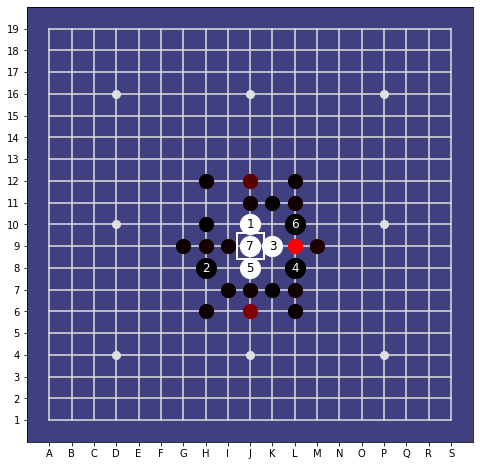

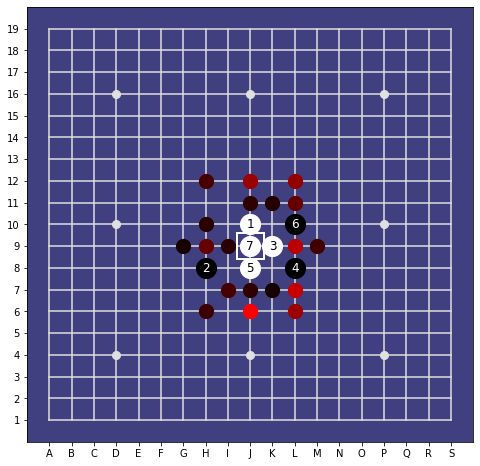

In [64]:
def scrutinize(board_size, stones, model, num_simus, disp_width):
    board = GomokuBoard(board_size, stones=stones)
    player = get_player(model, num_simus)
    analyse_board(board_size, stones, player.adviser, disp_width=disp_width)

    advice = player.adviser.advise(board.canonical_representation())
    move = np.where(advice == max(advice))[0][0]
    print(f"Next best by advice   : {board.Stone(move), move}")

    probs = player.mcts.get_action_prob(board, temperature=1.0)
    analyse_board(board_size, stones, probs, disp_width=disp_width)
    move = np.where(probs == np.max(probs, axis=None))[0][0]
    print(f"Next best by MCTS prob: {board.Stone(move), move}")

    qs = [player.mcts.Q.get((board.get_string_representation(), i), -1) for i in range(BOARD_SIZE**2)]
    player.mcts.Q.get((board.get_string_representation(), int(move)), 0)
    move = np.where(np.array(qs) == np.max(np.array(qs), axis=None))[0][0]
    print(f"Next best by MCTS QVal: {board.Stone(move), move}")

scrutinize(BOARD_SIZE, stones, MODEL_0, 400, 8)

In [65]:
#scrutinize(BOARD_SIZE, stones+"L9", MODEL_0, 400, 6)

In [67]:
board = GomokuBoard(BOARD_SIZE, stones=stones)
player = get_player(MODEL_0, 100)
player.mcts.get_action_prob(board, temperature=0)

[autoreload of aegomoku.gomoku_game failed: Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/lib/python3/dist-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/lib/python3/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/lib/python3/dist-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/usr/lib/python3/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/lib/python3/dist-packages/IPython/extensions/autoreload.py", line 266, in update_function
    setattr(old, name, getattr(new, name))
ValueError: __init__() requires a code object with 0 free vars, not 1
]


KeyboardInterrupt: 